In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [46]:
# Load the dataset
file_path = 'Downloads/New folder/Customer_data.xlsx'  
df = pd.read_excel(file_path)

In [48]:
# 1. Handle Missing Values
# Fill missing values in 'TotalCharges' with the median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Ensure numeric type
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [50]:
# 2. Convert Binary Categorical Variables to Numeric
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
binary_mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
df[binary_cols] = df[binary_cols].replace(binary_mapping)

In [52]:
# 3. One-Hot Encode Multi-Class Categorical Variables
multi_class_cols = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies']
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

In [54]:
# 4. Scale Numerical Features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [56]:
# 5. Drop Non-Predictive Columns
df.drop(columns=['customerID'], inplace=True)

In [58]:
# Verify the processed data
print("Processed Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows of the Processed Dataset:")
print(df.head())

Processed Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  InternetService_Fiber optic            7043 

In [60]:
# Save the preprocessed dataset to a new file (optional)
df.to_csv('Processed_Customer_Data.csv', index=False)

In [62]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (4930, 30)
Testing Data Shape: (2113, 30)


Logistic Regression AUC: 0.8448
Logistic Regression Accuracy: 0.8088

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113


Confusion Matrix:
[[1395  157]
 [ 247  314]]


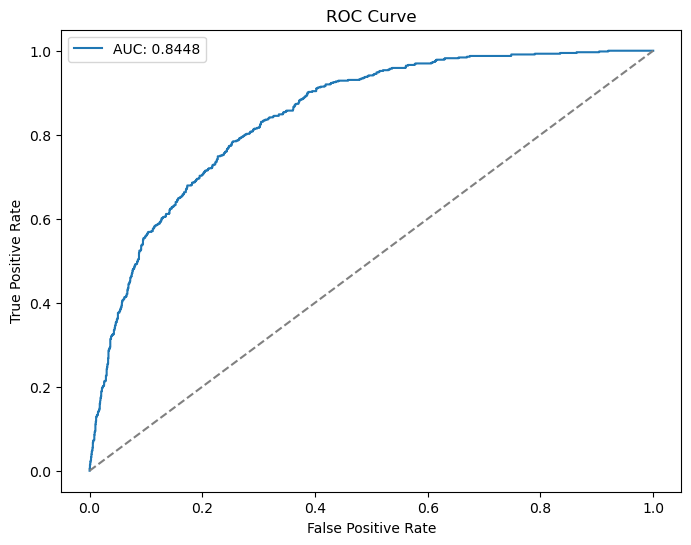

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

# Train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict probabilities and classes
y_pred_proba = log_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = log_model.predict(X_test)                   # Predicted classes

# Evaluate the model
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression AUC: {auc:.4f}")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC: {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [66]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Perform 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(log_model, X, y, cv=kf, scoring='roc_auc')

print(f"Cross-Validation AUC Scores: {cv_auc}")
print(f"Mean Cross-Validation AUC: {cv_auc.mean():.4f}")

Cross-Validation AUC Scores: [0.85448991 0.84539771 0.86358211 0.82531893 0.83634373]
Mean Cross-Validation AUC: 0.8450


In [68]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities and classes
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest AUC: {auc_rf:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest AUC: 0.8419
Random Forest Accuracy: 0.7974


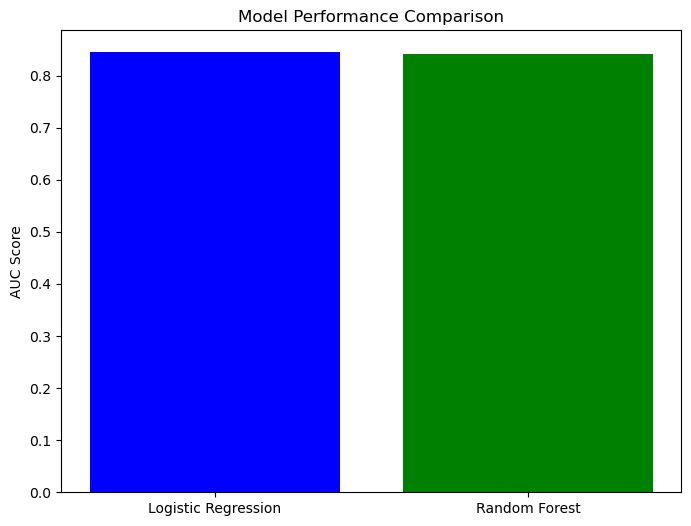

In [70]:
import matplotlib.pyplot as plt

# AUC scores for comparison
models = ['Logistic Regression', 'Random Forest']
auc_scores = [auc, auc_rf]

# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(models, auc_scores, color=['blue', 'green'])
plt.ylabel("AUC Score")
plt.title("Model Performance Comparison")
plt.show()

In [76]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best AUC: {grid_search.best_score_:.4f}")

# Use the best model for evaluation
best_rf_model = grid_search.best_estimator_
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Tuned Random Forest AUC: {auc_rf:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best AUC: 0.8466
Tuned Random Forest AUC: 0.8420


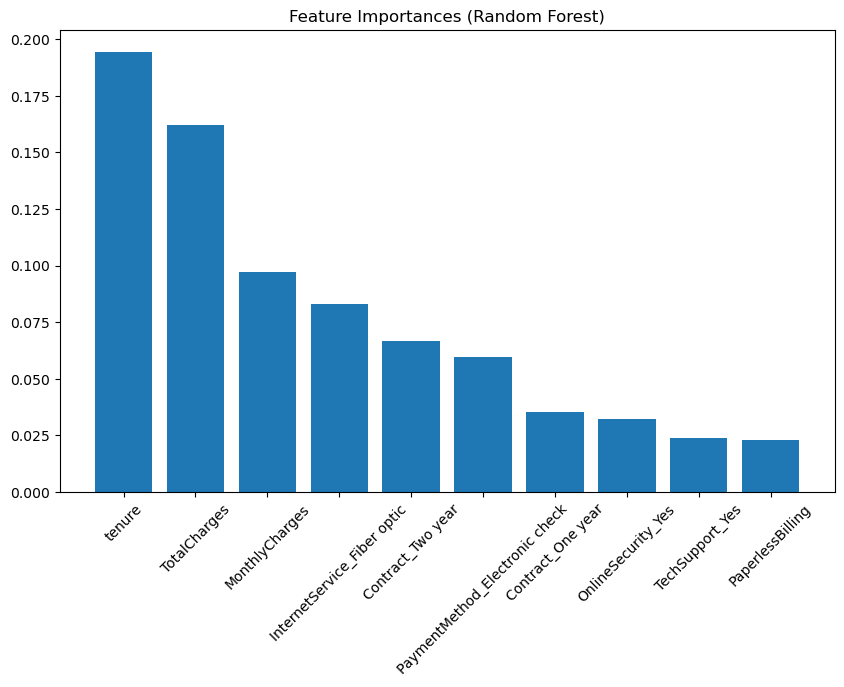

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from Random Forest
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45)
plt.show()

XGBoost AUC: 0.8335


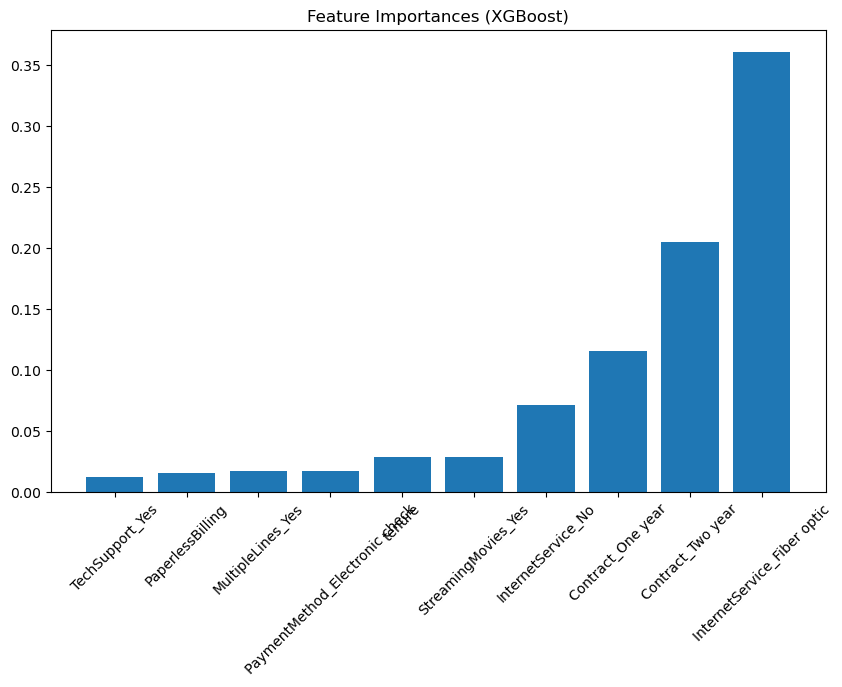

In [82]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict probabilities and evaluate
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"XGBoost AUC: {auc_xgb:.4f}")

# Feature importance
xgb_importances = xgb_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost)")
plt.bar(range(10), xgb_importances[np.argsort(xgb_importances)[-10:]], align="center")
plt.xticks(range(10), X_train.columns[np.argsort(xgb_importances)[-10:]], rotation=45)
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265314 -> initscore=-1.018527
[LightGBM] [Info] Start training from score -1.018527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

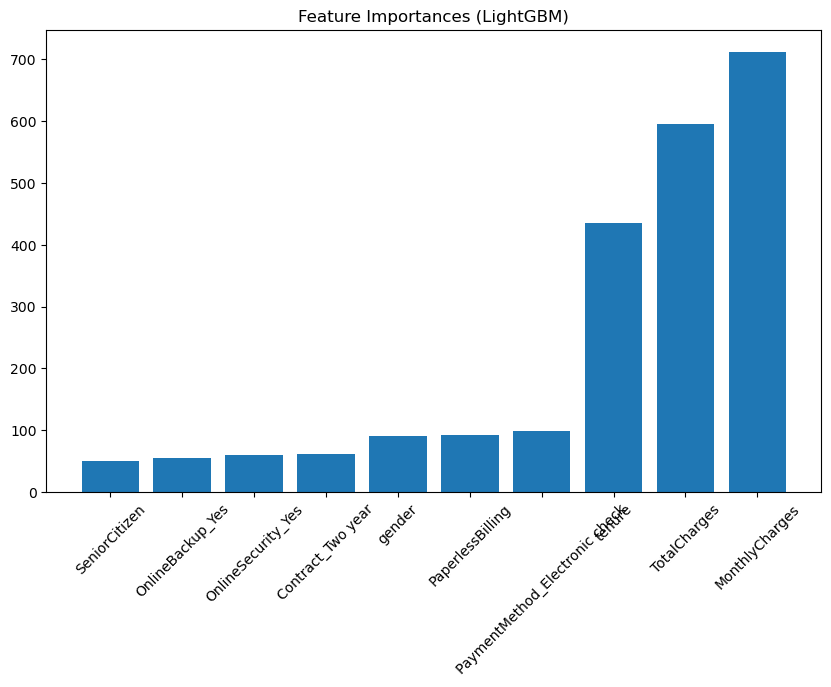

In [86]:
import lightgbm as lgb

# Train LightGBM Classifier
lgb_model = lgb.LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# Predict probabilities and evaluate
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]
auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
print(f"LightGBM AUC: {auc_lgb:.4f}")

# Feature importance
lgb_importances = lgb_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (LightGBM)")
plt.bar(range(10), lgb_importances[np.argsort(lgb_importances)[-10:]], align="center")
plt.xticks(range(10), X_train.columns[np.argsort(lgb_importances)[-10:]], rotation=45)
plt.show()

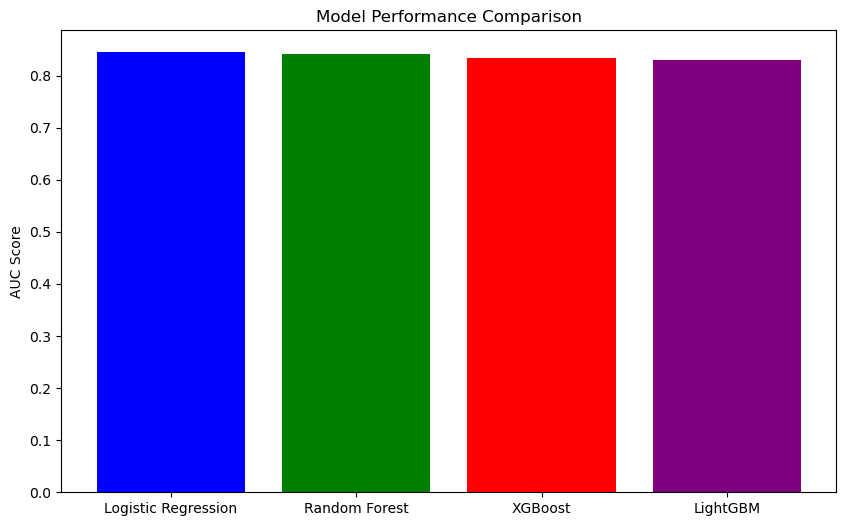

In [88]:
# AUC scores for comparison
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']
auc_scores = [auc, auc_rf, auc_xgb, auc_lgb]

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(models, auc_scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("AUC Score")
plt.title("Model Performance Comparison")
plt.show()